# Projects -Cohort Analysis for assessing customer retention in E-commerce industry

## 02 - Exploratory Data Analysis (EDA) - Sales & Customer Behavior

In this notebook, we explore the dataset to better understand:

- Overall sales trends over time
- Top-selling products
- Customer activity and purchasing frequency
- Patterns in purchase behavior (quantity, price, time)

This will help us identify key insights before moving on to modeling or segmentation.

Dataset: Cleaned_Dataset_ecommerce.csv

In [510]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

dataset_path = os.path.join("..", "dataset", "Cleaned_Dataset_ecommerce.csv")
#dataset_path = os.path.join("..", "dataset", "Cleaned_Dataset_ecommerce.pkl")

df = pd.read_csv(dataset_path)
#df = pd.read_pickle(dataset_path)

df

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,TotalPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,664.95,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,1862.95,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,4796.22,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,370.95,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,1941.50,Rwanda
...,...,...,...,...,...,...,...,...,...
406824,581587,2011-12-09 12:50:00,12680.0,SC5440,Furniture,25,36.53,913.25,Mozambique
406825,581587,2011-12-09 12:50:00,12680.0,SC3576,Cloths,94,90.65,8521.10,Tunisia
406826,581587,2011-12-09 12:50:00,12680.0,SC5283,Furniture,14,40.07,560.98,Somalia
406827,581587,2011-12-09 12:50:00,12680.0,SC1099,Cosmetics,45,79.83,3592.35,Senegal


### Sales Trends

We analyze sales performance over time to identify business trends, seasonality, and growth patterns.  
This includes tracking revenue by month and visualizing key changes that inform strategic decisions.

In [512]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
df

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,TotalPrice,Country,InvoiceMonth
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,664.95,Egypt,2010-12
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,1862.95,Mali,2010-12
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,4796.22,Mali,2010-12
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,370.95,South Africa,2010-12
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,1941.50,Rwanda,2010-12
...,...,...,...,...,...,...,...,...,...,...
406824,581587,2011-12-09 12:50:00,12680.0,SC5440,Furniture,25,36.53,913.25,Mozambique,2011-12
406825,581587,2011-12-09 12:50:00,12680.0,SC3576,Cloths,94,90.65,8521.10,Tunisia,2011-12
406826,581587,2011-12-09 12:50:00,12680.0,SC5283,Furniture,14,40.07,560.98,Somalia,2011-12
406827,581587,2011-12-09 12:50:00,12680.0,SC1099,Cosmetics,45,79.83,3592.35,Senegal,2011-12


In [514]:
monthly_revenue = df.groupby('InvoiceMonth')['TotalPrice'].sum().reset_index()
#monthly_revenue = monthly_revenue.sort_values("TotalPrice", ascending=False)

In [516]:
monthly_revenue

,InvoiceMonth,TotalPrice
0,2010-12,6.792367e+07
1,2011-01,5.582933e+07
2,2011-02,5.208536e+07
3,2011-03,7.137210e+07
4,2011-04,5.914003e+07
5,2011-05,7.434151e+07
6,2011-06,7.109639e+07
7,2011-07,7.040789e+07
8,2011-08,6.994326e+07
9,2011-09,1.036281e+08


<function matplotlib.pyplot.show(close=None, block=None)>

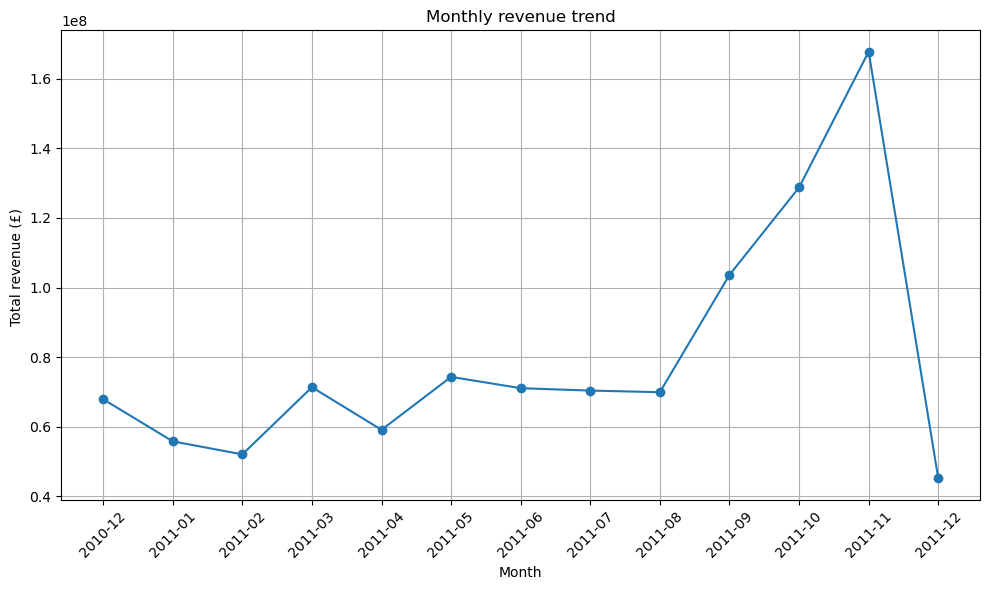

In [518]:
# Plot the monthly revenue trend
plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue['InvoiceMonth'].astype(str), monthly_revenue['TotalPrice'], marker='o')
plt.title('Monthly revenue trend')
plt.xlabel('Month')
plt.ylabel('Total revenue (£) ')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show

In [520]:
Quantity_by_country = df.groupby('Country')['Quantity'].sum().reset_index()

In [522]:
Quantity_by_country

,Country,Quantity
0,Algeria,736181
1,Benin,738133
2,Burkina Faso,728332
3,Cameroon,730881
4,Cote d'Ivoire,740229
5,Egypt,729299
6,Ethiopia,732940
7,Ghana,735354
8,Kenya,732247
9,Libya,739206


In [524]:
Quantity_by_country = Quantity_by_country.sort_values('Quantity', ascending = False)
Quantity_by_country.head(5)

,Country,Quantity
23,Togo,741223
20,South Africa,740589
4,Cote d'Ivoire,740229
15,Nigeria,739708
9,Libya,739206


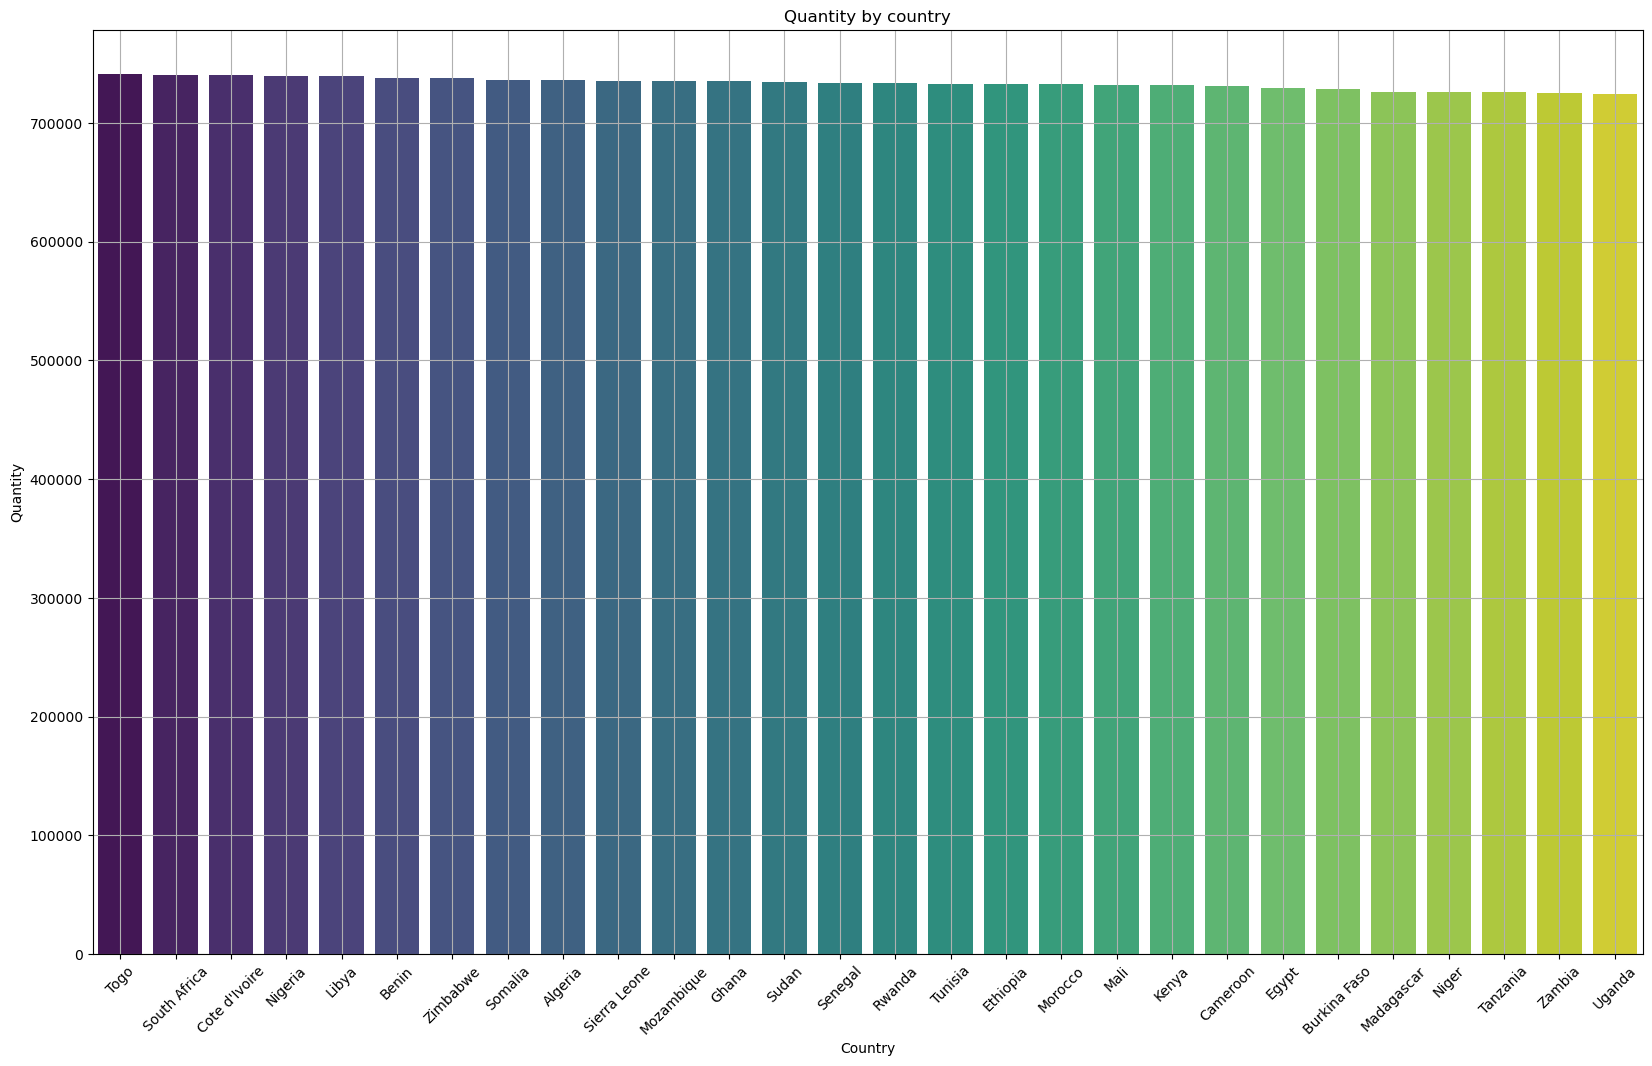

In [526]:
# barchart for contries
plt.figure(figsize=(20, 12))
sns.barplot(data = Quantity_by_country, x = 'Country', y = 'Quantity', palette='viridis', hue='Country', legend=False)
plt.title('Quantity by country')
plt.xlabel('Country')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [530]:
Quantity_by_month = df.groupby('InvoiceMonth')['Quantity'].sum().reset_index()
Quantity_by_month

,InvoiceMonth,Quantity
0,2010-12,1350834
1,2011-01,1105886
2,2011-02,1033468
3,2011-03,1406617
4,2011-04,1175052
5,2011-05,1459981
6,2011-06,1402857
7,2011-07,1388119
8,2011-08,1387695
9,2011-09,2061181


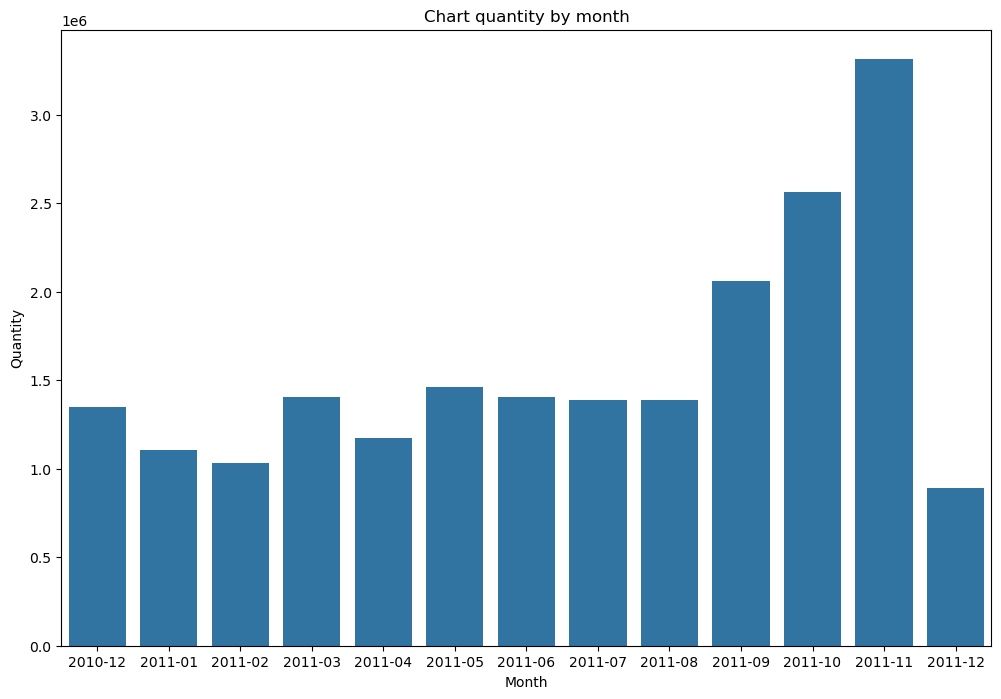

In [532]:
# plot quantity by month
plt.figure(figsize=(12, 8))
sns.barplot(data = Quantity_by_month, x = 'InvoiceMonth', y = 'Quantity')
plt.title('Chart quantity by month')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.show()

In [536]:
Quantity_by_month = Quantity_by_month.sort_values('Quantity', ascending = False).reset_index()
Quantity_by_month

,level_0,index,InvoiceMonth,Quantity
0,0,11,2011-11,3313177
1,1,10,2011-10,2559609
2,2,9,2011-09,2061181
3,3,5,2011-05,1459981
4,4,3,2011-03,1406617
5,5,6,2011-06,1402857
6,6,7,2011-07,1388119
7,7,8,2011-08,1387695
8,8,0,2010-12,1350834
9,9,4,2011-04,1175052


In [538]:
Number_of_invoices_per_month = df.groupby('InvoiceMonth')['InvoiceNo'].count().reset_index()
#Number_of_invoices_per_month = Number_of_invoices_per_month.sort_values('InvoiceNo', ascending=False).reset_index()
Number_of_invoices_per_month

,InvoiceMonth,InvoiceNo
0,2010-12,26850
1,2011-01,21912
2,2011-02,20363
3,2011-03,27822
4,2011-04,23198
5,2011-05,28908
6,2011-06,27836
7,2011-07,27502
8,2011-08,27662
9,2011-09,40822


In [165]:
# Exporte ce dataset en Excel
Number_of_invoices_per_month.to_excel('../dataset/Number_of_invoices_per_month.xlsx', index=False)

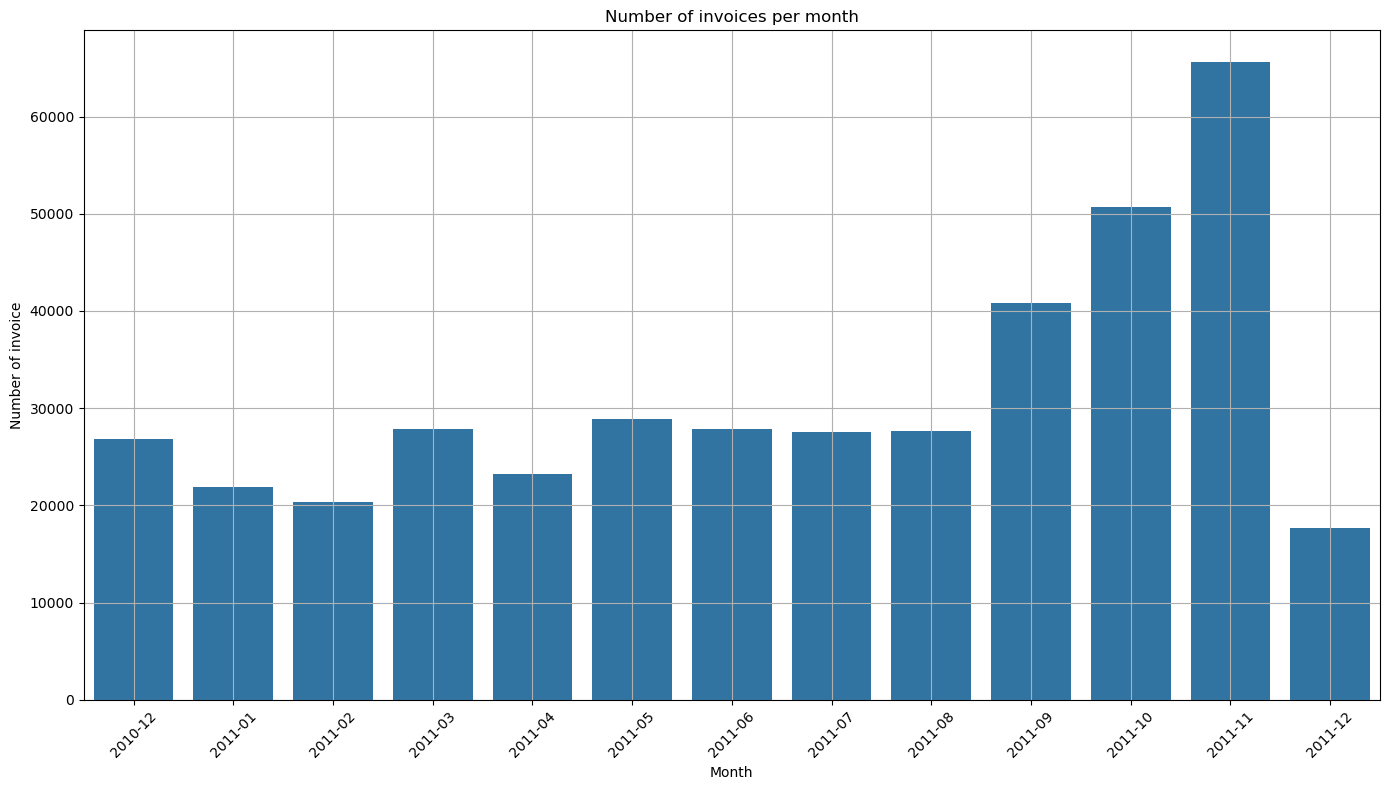

In [540]:
# Create the bar plot
plt.figure(figsize=(14, 8))
sns.barplot(data = Number_of_invoices_per_month, x = 'InvoiceMonth', y = 'InvoiceNo')
plt.title('Number of invoices per month')
plt.xlabel('Month')
plt.ylabel('Number of invoice')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

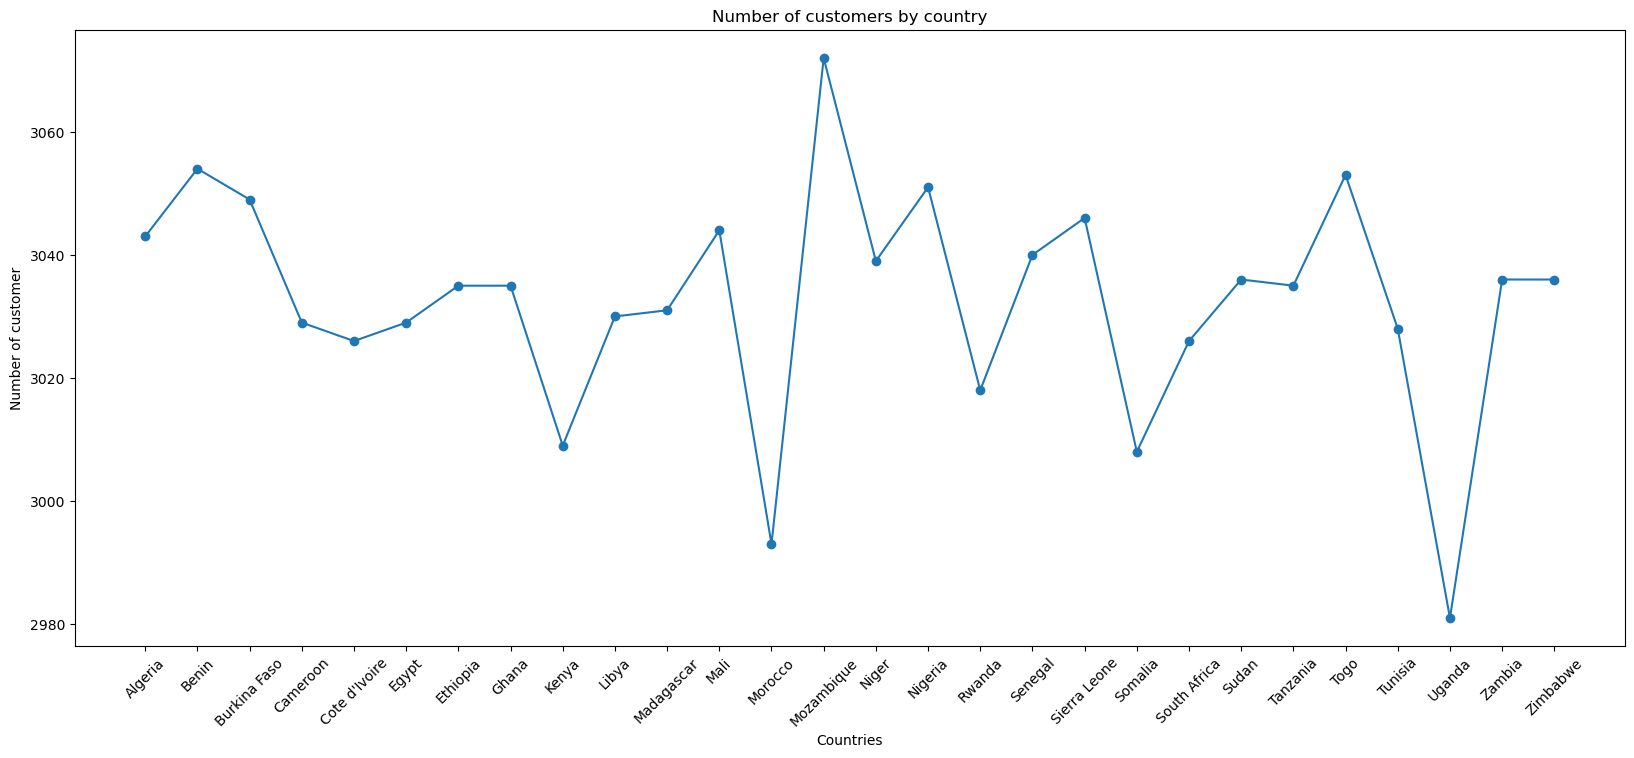

In [542]:
# Analysis countries ans customers
Country_by_customer = df.groupby('Country')['CustomerID'].nunique().reset_index()

#plot
plt.figure(figsize=(20, 8))
plt.plot(Country_by_customer['Country'], Country_by_customer['CustomerID'], marker='o')
plt.title('Number of customers by country')
plt.xlabel('Countries')
plt.ylabel('Number of customer')
plt.xticks(rotation=45)
plt.show()
#Country_by_customer

In [544]:
# Extracting Date without Time
#For certain analyses, the time component is not needed.  
#We create a new column containing only the date (year-month-day) from the `InvoiceDate`.

df['InvoiceDate2'] = df['InvoiceDate'].dt.date
#df = df.drop('InvoiceDateOnly', axis=1)
df

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,TotalPrice,Country,InvoiceMonth,InvoiceDate2
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,664.95,Egypt,2010-12,2010-12-01
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,1862.95,Mali,2010-12,2010-12-01
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,4796.22,Mali,2010-12,2010-12-01
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,370.95,South Africa,2010-12,2010-12-01
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,1941.50,Rwanda,2010-12,2010-12-01
...,...,...,...,...,...,...,...,...,...,...,...
406824,581587,2011-12-09 12:50:00,12680.0,SC5440,Furniture,25,36.53,913.25,Mozambique,2011-12,2011-12-09
406825,581587,2011-12-09 12:50:00,12680.0,SC3576,Cloths,94,90.65,8521.10,Tunisia,2011-12,2011-12-09
406826,581587,2011-12-09 12:50:00,12680.0,SC5283,Furniture,14,40.07,560.98,Somalia,2011-12,2011-12-09
406827,581587,2011-12-09 12:50:00,12680.0,SC1099,Cosmetics,45,79.83,3592.35,Senegal,2011-12,2011-12-09


### Top Products Analysis (Products)

Find the best-selling products by quantity and revenue.<br>
Analyze products:<br>
Which products are most sold?<br>
Which generate the most revenue?

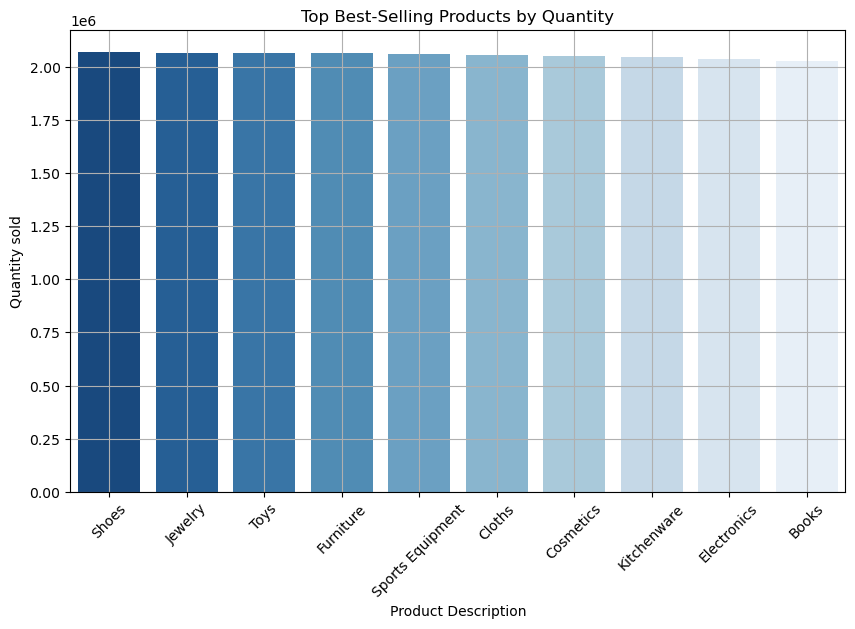

In [546]:
# Top products by quantity sold

top_products_quantity = df.groupby('Description')['Quantity'].sum().reset_index()
top_products_quantity = top_products_quantity.sort_values('Quantity', ascending=False)

plt.figure(figsize=(10, 6))
#plt.plot(top_products_quantity['Description'], top_products_quantity['Quantity'], marker = 'o')
sns.barplot(data =top_products_quantity  ,x = 'Description', y = 'Quantity', palette='Blues_r', hue = 'Description', legend=False)
plt.title('Top Best-Selling Products by Quantity')
plt.xlabel('Product Description')
plt.ylabel('Quantity sold')
plt.xticks(rotation=45)
plt.grid()
plt.show()

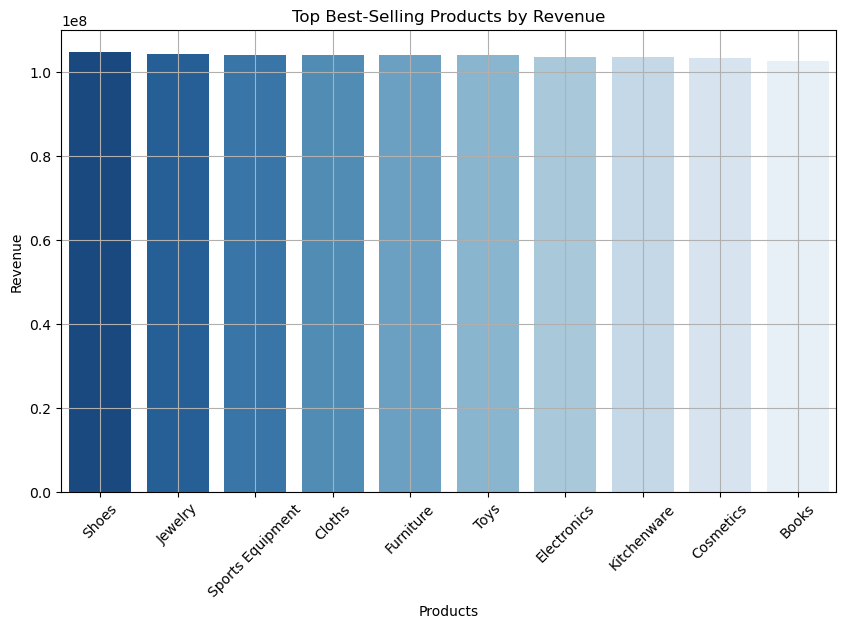

In [552]:
# Top product by revenue

top_products_revenue = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data = top_products_revenue, x = 'Description', y = 'TotalPrice', palette='Blues_r', hue = 'Description', legend=False)
plt.title('Top Best-Selling Products by Revenue')
plt.xlabel('Products')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid()
plt.show()

### Customer Activity (Customer behavior)

Understand how active your customers are.<br>
Analyze customers:<br>
Who are the most active customers?<br>
How many orders per customer?<br>
Total money spent per customer?

In [554]:
# Who are the most active customers and How many orders per customer ?

most_active_customers = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
# rename column
most_active_customers.rename(columns={'InvoiceNo': 'NumberOfOrders'}, inplace=True)
most_active_customers = most_active_customers.sort_values('NumberOfOrders', ascending=False)
# Show the top 10 most active customers
most_active_customers.head(10)

,CustomerID,NumberOfOrders
1895,14911.0,248
330,12748.0,224
4042,17841.0,169
1674,14606.0,128
568,13089.0,118
2192,15311.0,118
487,12971.0,89
1615,14527.0,86
803,13408.0,81
1703,14646.0,77


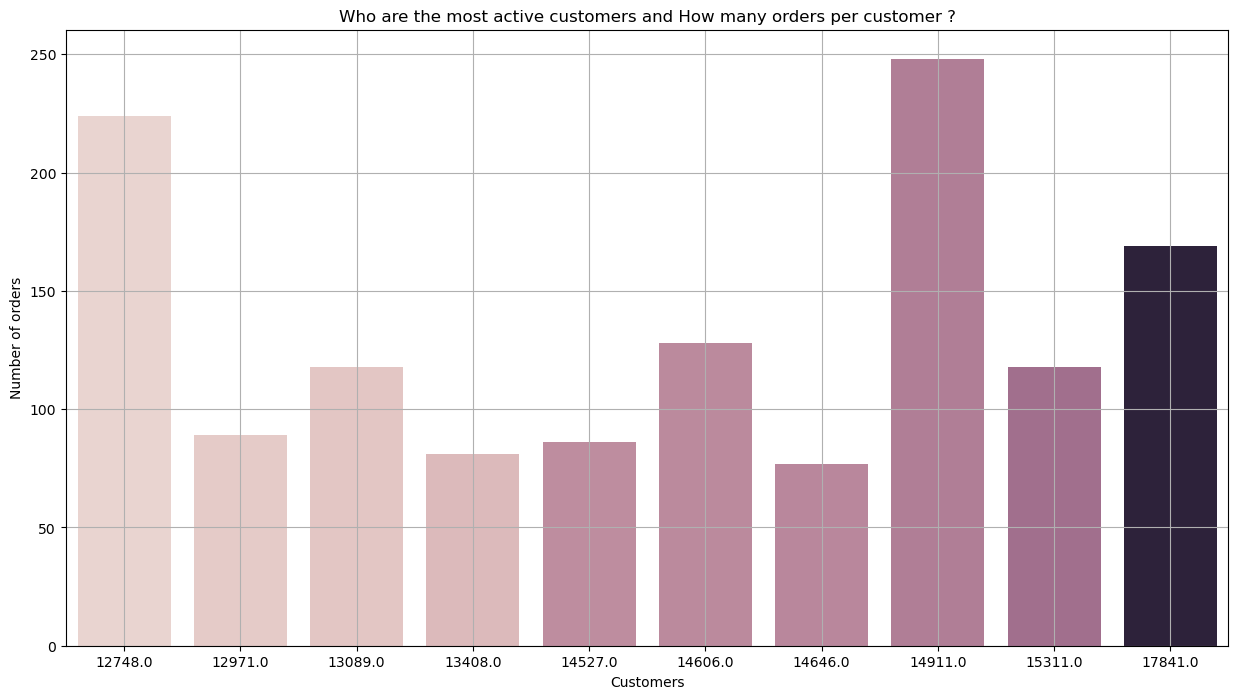

In [558]:
#plot
plt.figure(figsize=(15, 8))
sns.barplot(data = most_active_customers.head(10), x = 'CustomerID', y = 'NumberOfOrders', hue = 'CustomerID', legend=False)
plt.title('Who are the most active customers and How many orders per customer ?')
plt.xlabel('Customers')
plt.ylabel('Number of orders')
plt.grid()
plt.show()

In [560]:
# Total money spent per customer

total_money_spent_per_customer = df.groupby('CustomerID')['TotalPrice'].sum().reset_index()
total_money_spent_per_customer = total_money_spent_per_customer.sort_values('TotalPrice', ascending=False)
total_money_spent_per_customer.head(10)

,CustomerID,TotalPrice
4042,17841.0,20383830.65
1895,14911.0,15362741.47
1300,14096.0,12965429.74
330,12748.0,11912482.34
1674,14606.0,7144512.92
2192,15311.0,6301150.63
1703,14646.0,5418075.66
568,13089.0,4739395.74
698,13263.0,4233075.52
1447,14298.0,4123714.52


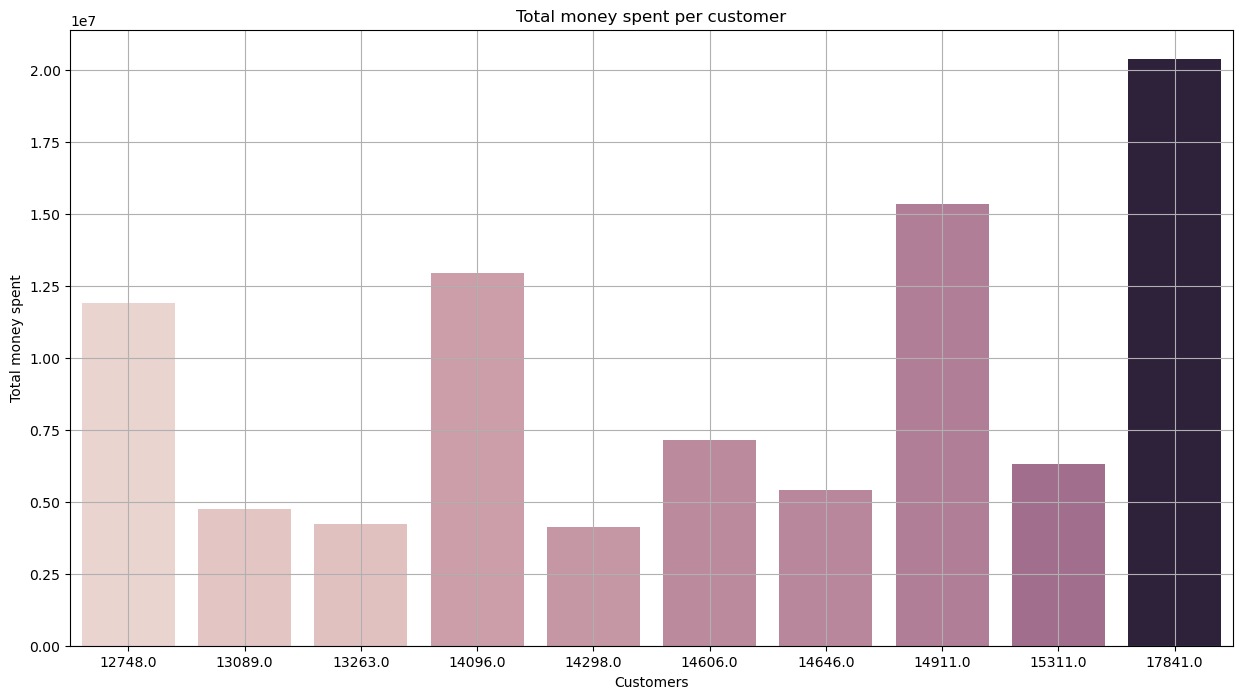

In [562]:
#plot
plt.figure(figsize=(15, 8))
sns.barplot(data = total_money_spent_per_customer.head(10), x = 'CustomerID', y = 'TotalPrice', hue = 'CustomerID', legend=False)
plt.title('Total money spent per customer')
plt.xlabel('Customers')
plt.ylabel('Total money spent')
plt.grid()
plt.show()

### Purchase Behavior (How do they buy?)

Understand quantity of purchases and order time.

Analyze order patterns:<br>
How big are purchases (quantities)?<br>
At what times customers buy most?

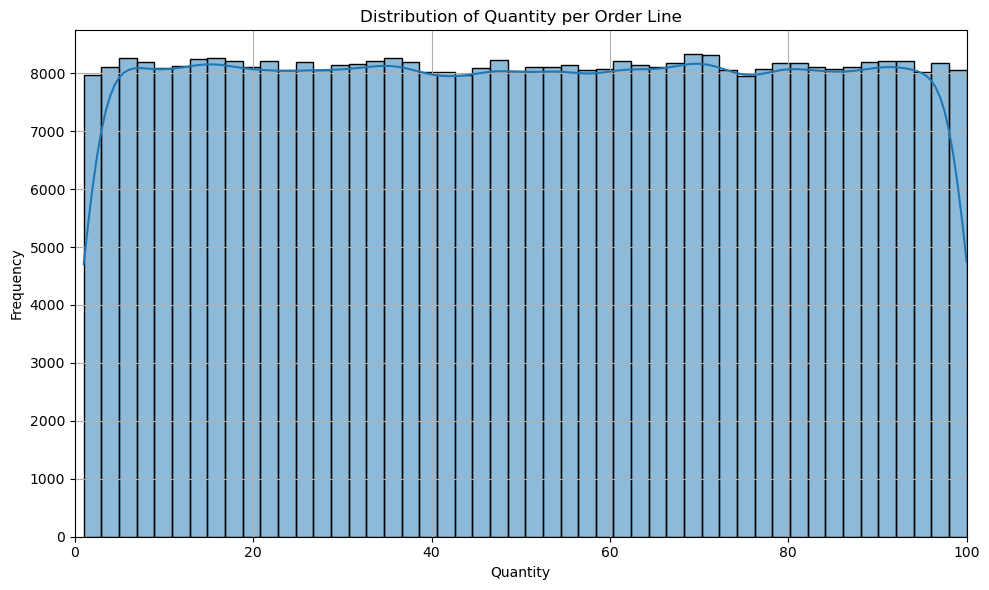

In [564]:
# Quantity behavior:
# Analyzing how many items customers typically purchase per order line helps detect buying patterns and identify unusual behaviors (e.g., bulk purchases or errors).

plt.figure(figsize=(10,6))
sns.histplot(df['Quantity'], bins=50, kde=True)
plt.title('Distribution of Quantity per Order Line')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.xlim(0,100)
plt.grid(True)
plt.tight_layout()
plt.show()

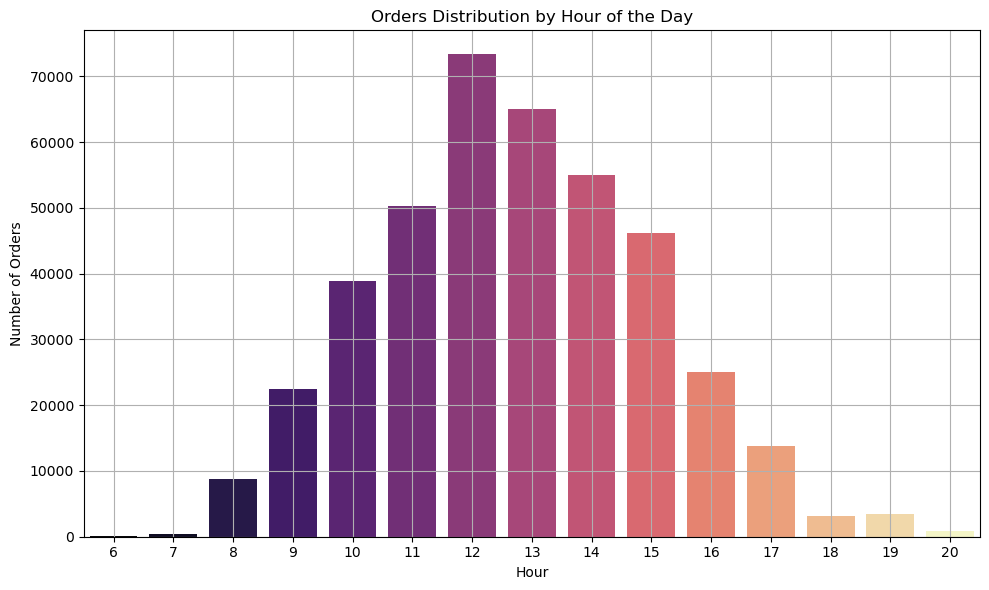

In [566]:
# Time of purchases:
# Examining at which hours of the day customers place orders reveals peak activity periods, supporting better planning for marketing campaigns, promotions, and operations.

# Extract the hour from InvoiceDate
df['Hour'] = pd.to_datetime(df['InvoiceDate']).dt.hour

# Plot orders per hour
plt.figure(figsize=(10,6))
sns.countplot(x='Hour', data=df, palette='magma', hue='Hour', legend=False)
plt.title('Orders Distribution by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.tight_layout()
plt.show()

In [572]:
# Export df to csv
df.to_csv('../dataset/Cleaned_Dataset_ecommerce2.csv', index=False)

# Export df to pickle
df.to_pickle('../dataset/Cleaned_Dataset_ecommerce2.pkl')